In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('data.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.nunique().reset_index().rename(columns={'index':'column',0:'unique count'})

,column,unique count
0,Age,43
1,Attrition,2
2,BusinessTravel,3
3,DailyRate,886
4,Department,3
5,DistanceFromHome,29
6,Education,5
7,EducationField,6
8,EmployeeCount,1
9,EmployeeNumber,1470


In [5]:
# Reassign target
df.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
# Drop useless feat
data = df.drop(columns=['StandardHours', 
                          'EmployeeCount', 
                          'Over18',
                        ])

In [6]:
cat_cols = [col for col in df.columns if df[col].nunique() < 10]
num_cols = [col for col in df.columns if df[col].nunique() >= 10]

print(cat_cols)
print(num_cols)

['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']
['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [7]:
df.drop(['EmployeeCount','Over18','StandardHours'],inplace=True,axis=1)

In [8]:
df[num_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.00,10.0,15.00,40.0


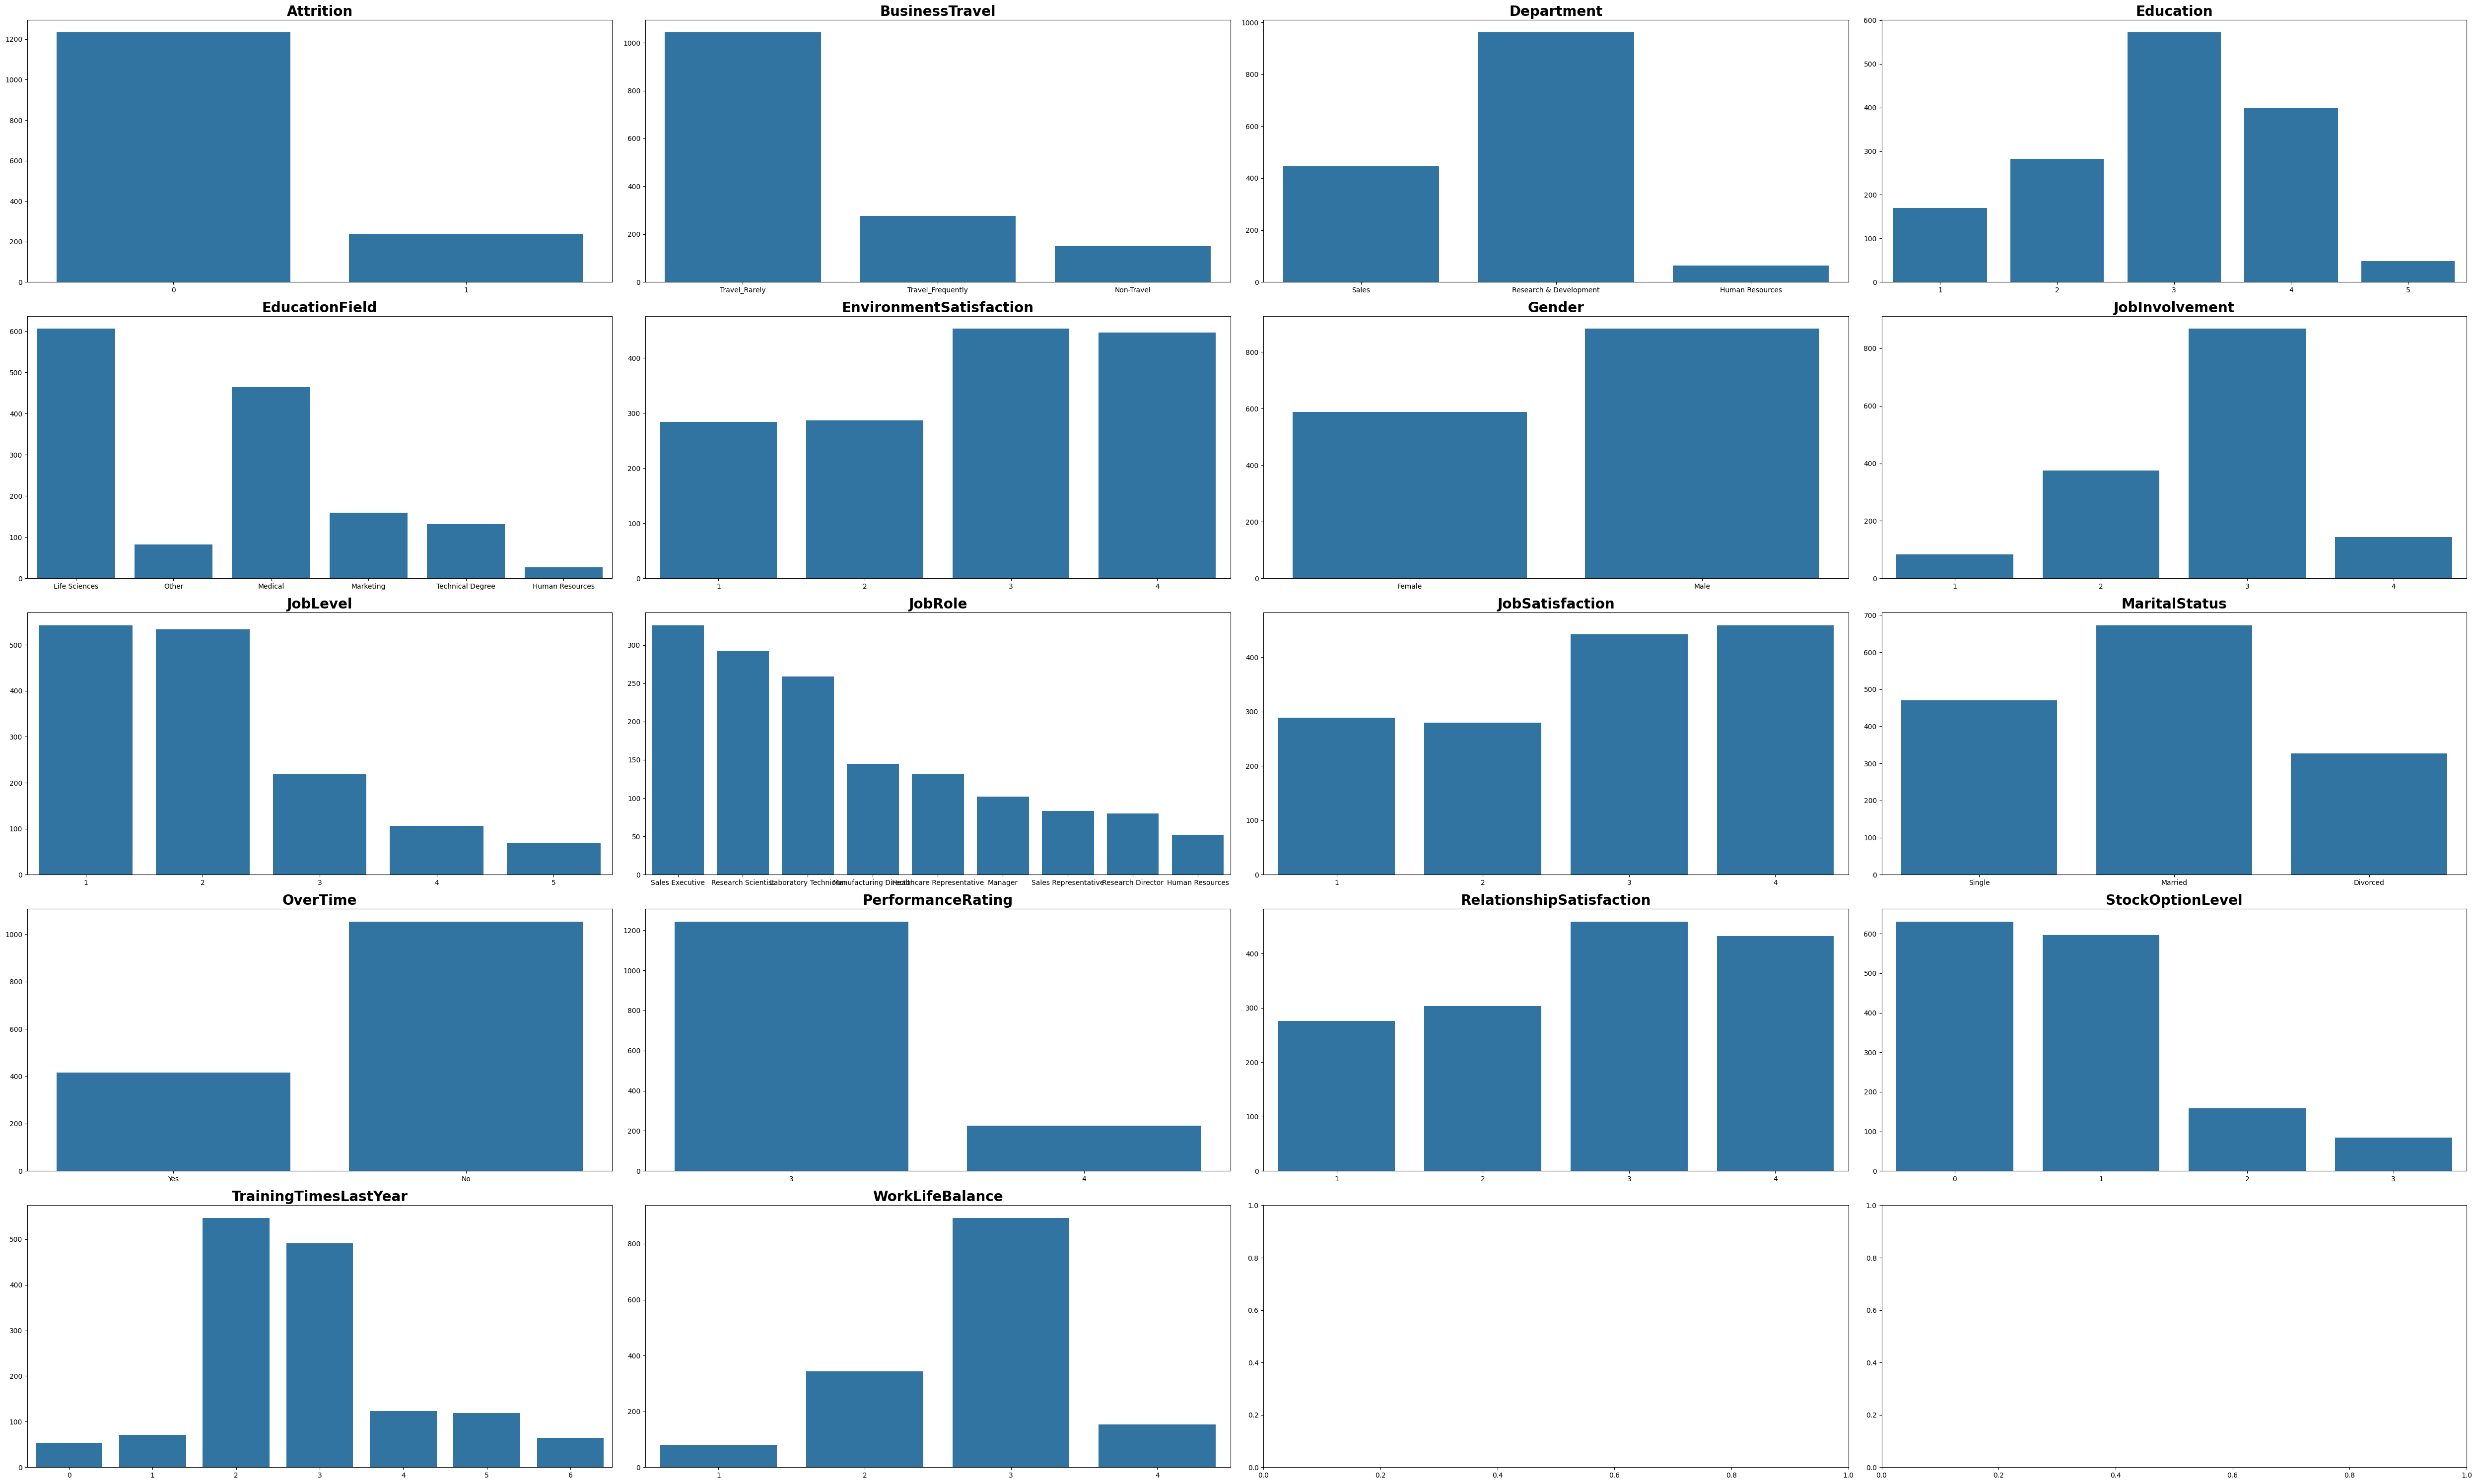

In [9]:
cat_cols=['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']

fig,axes=plt.subplots(5,4,figsize=(50,30))
axes=axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df , ax=axes[i])
    axes[i].set_title(col, fontsize=20, fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

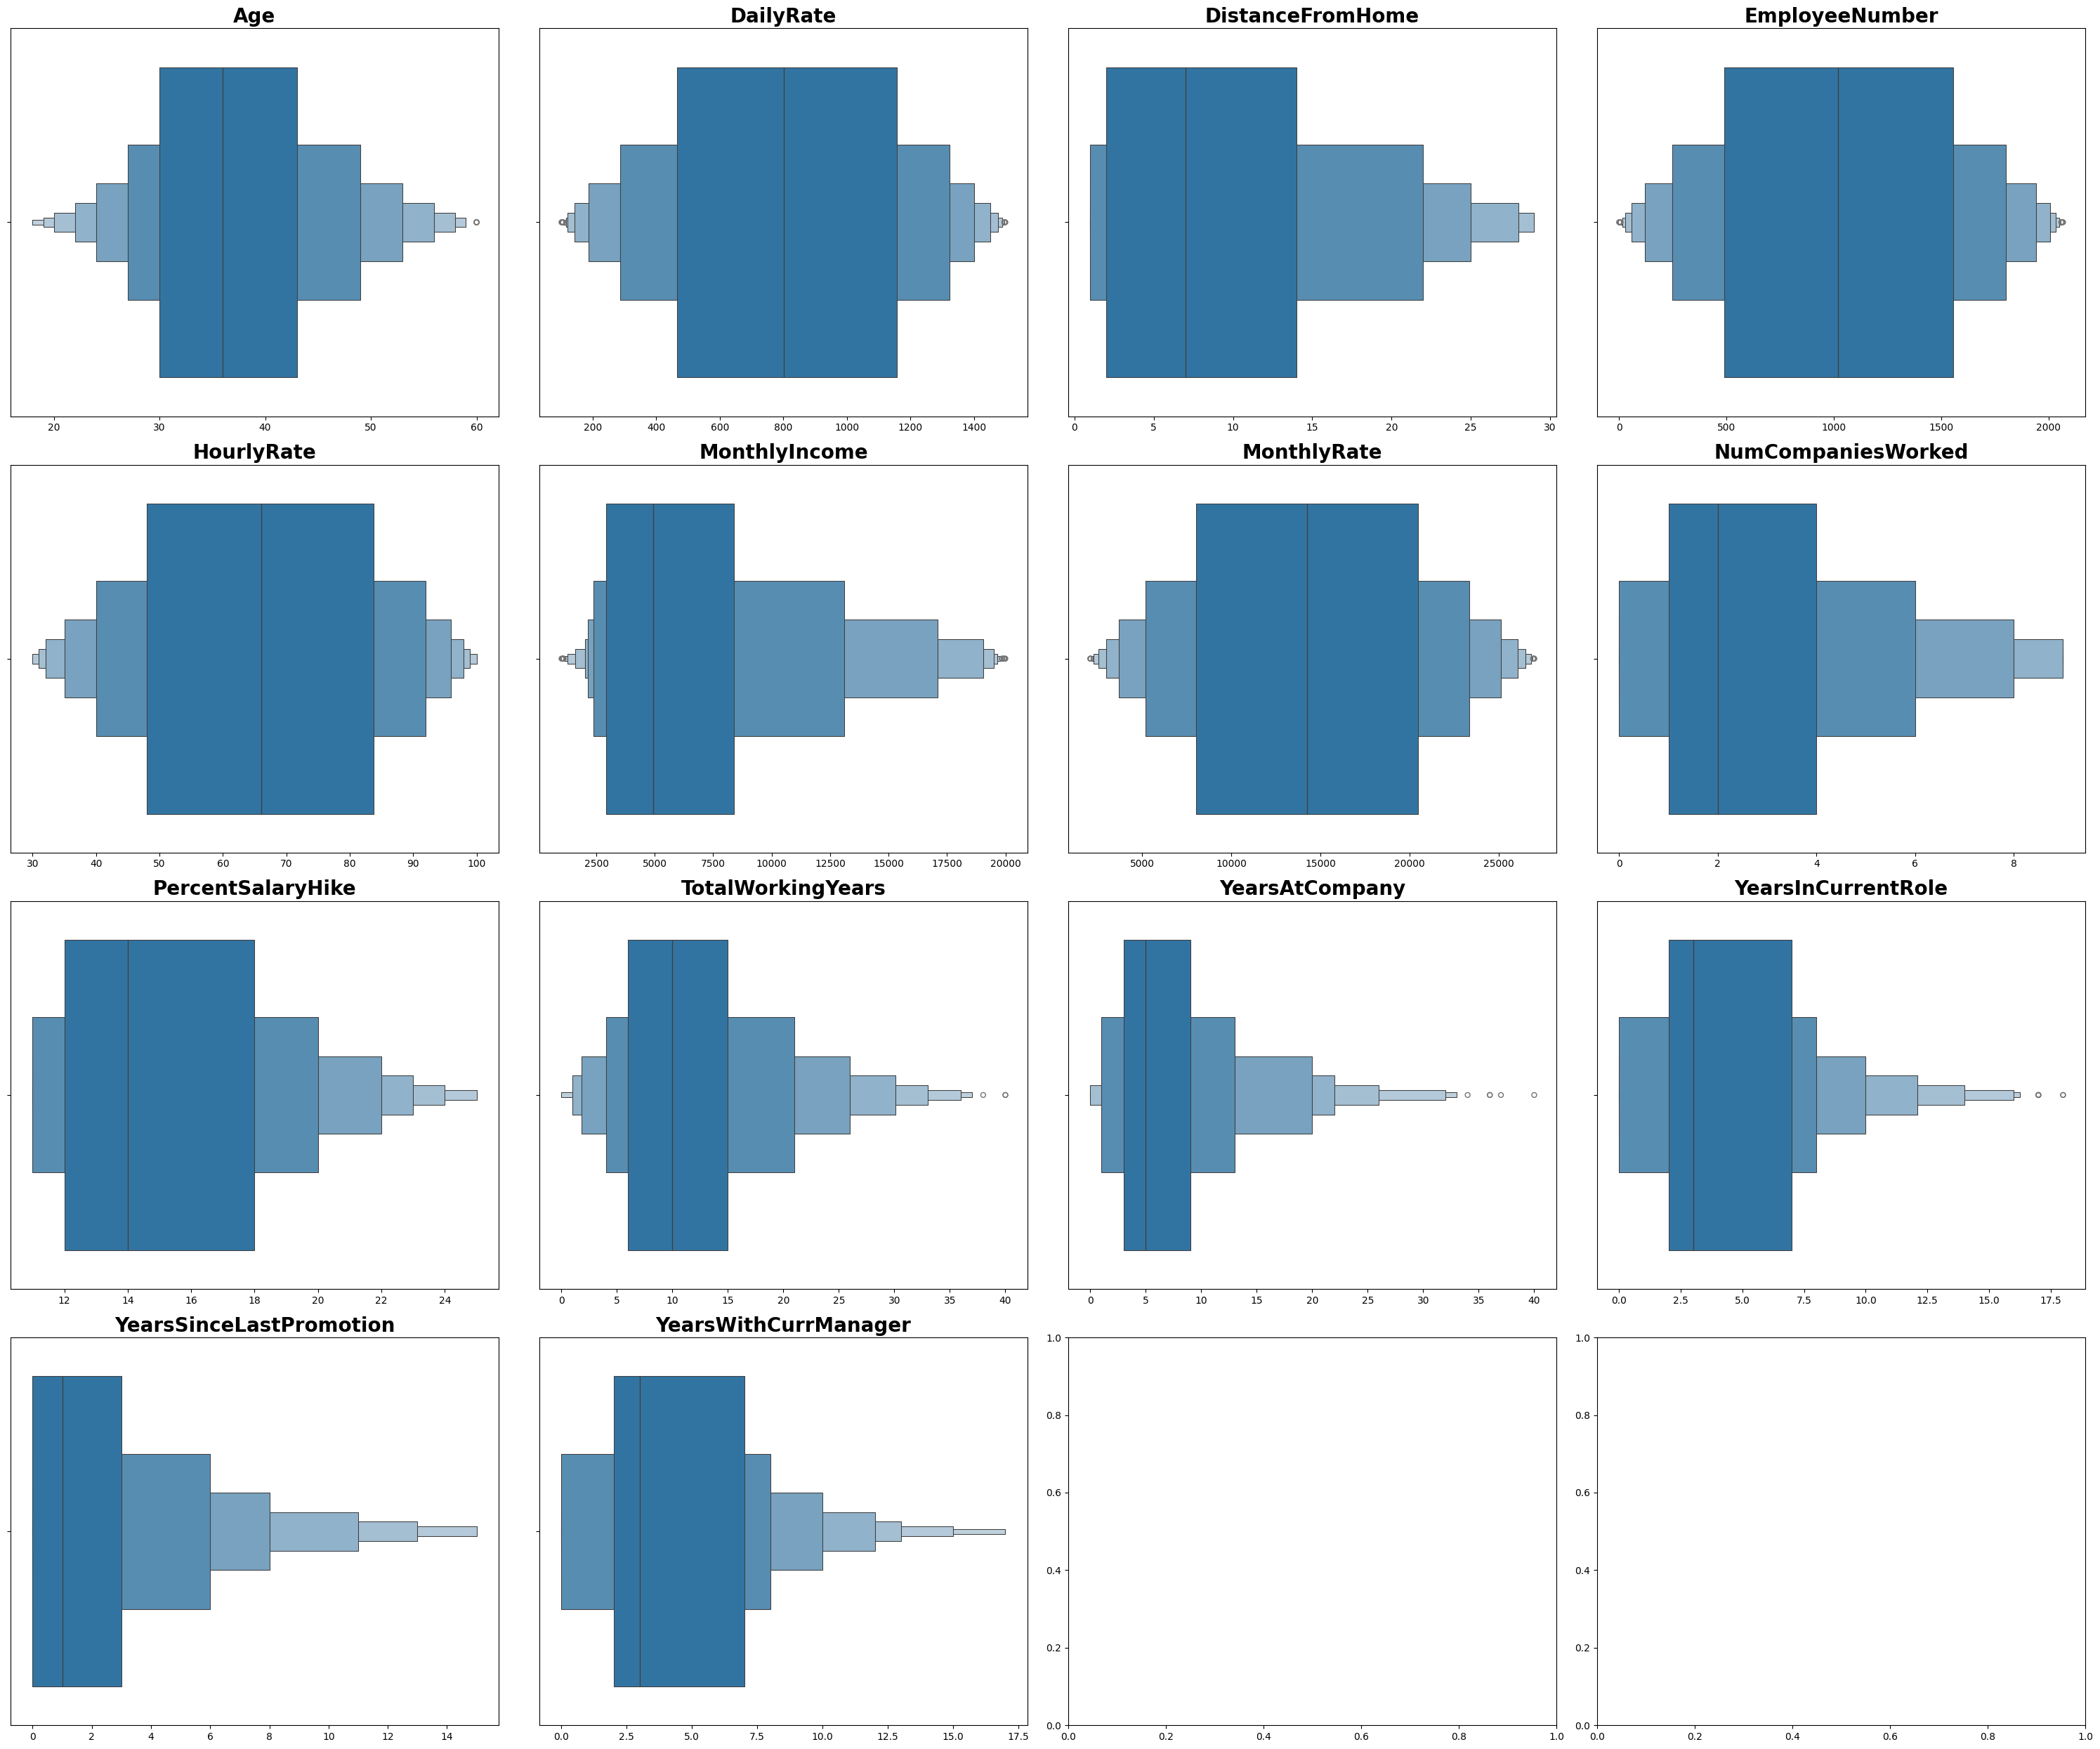

In [10]:
num_cols=['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

fig, axes = plt.subplots(4,4, figsize=(30,25))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxenplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col, fontsize=20, fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

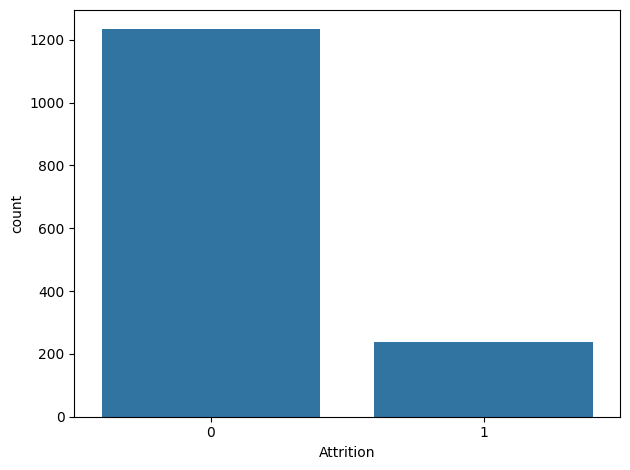

In [11]:
sns.countplot(x=df['Attrition'], data=df,)


plt.tight_layout()
plt.show()


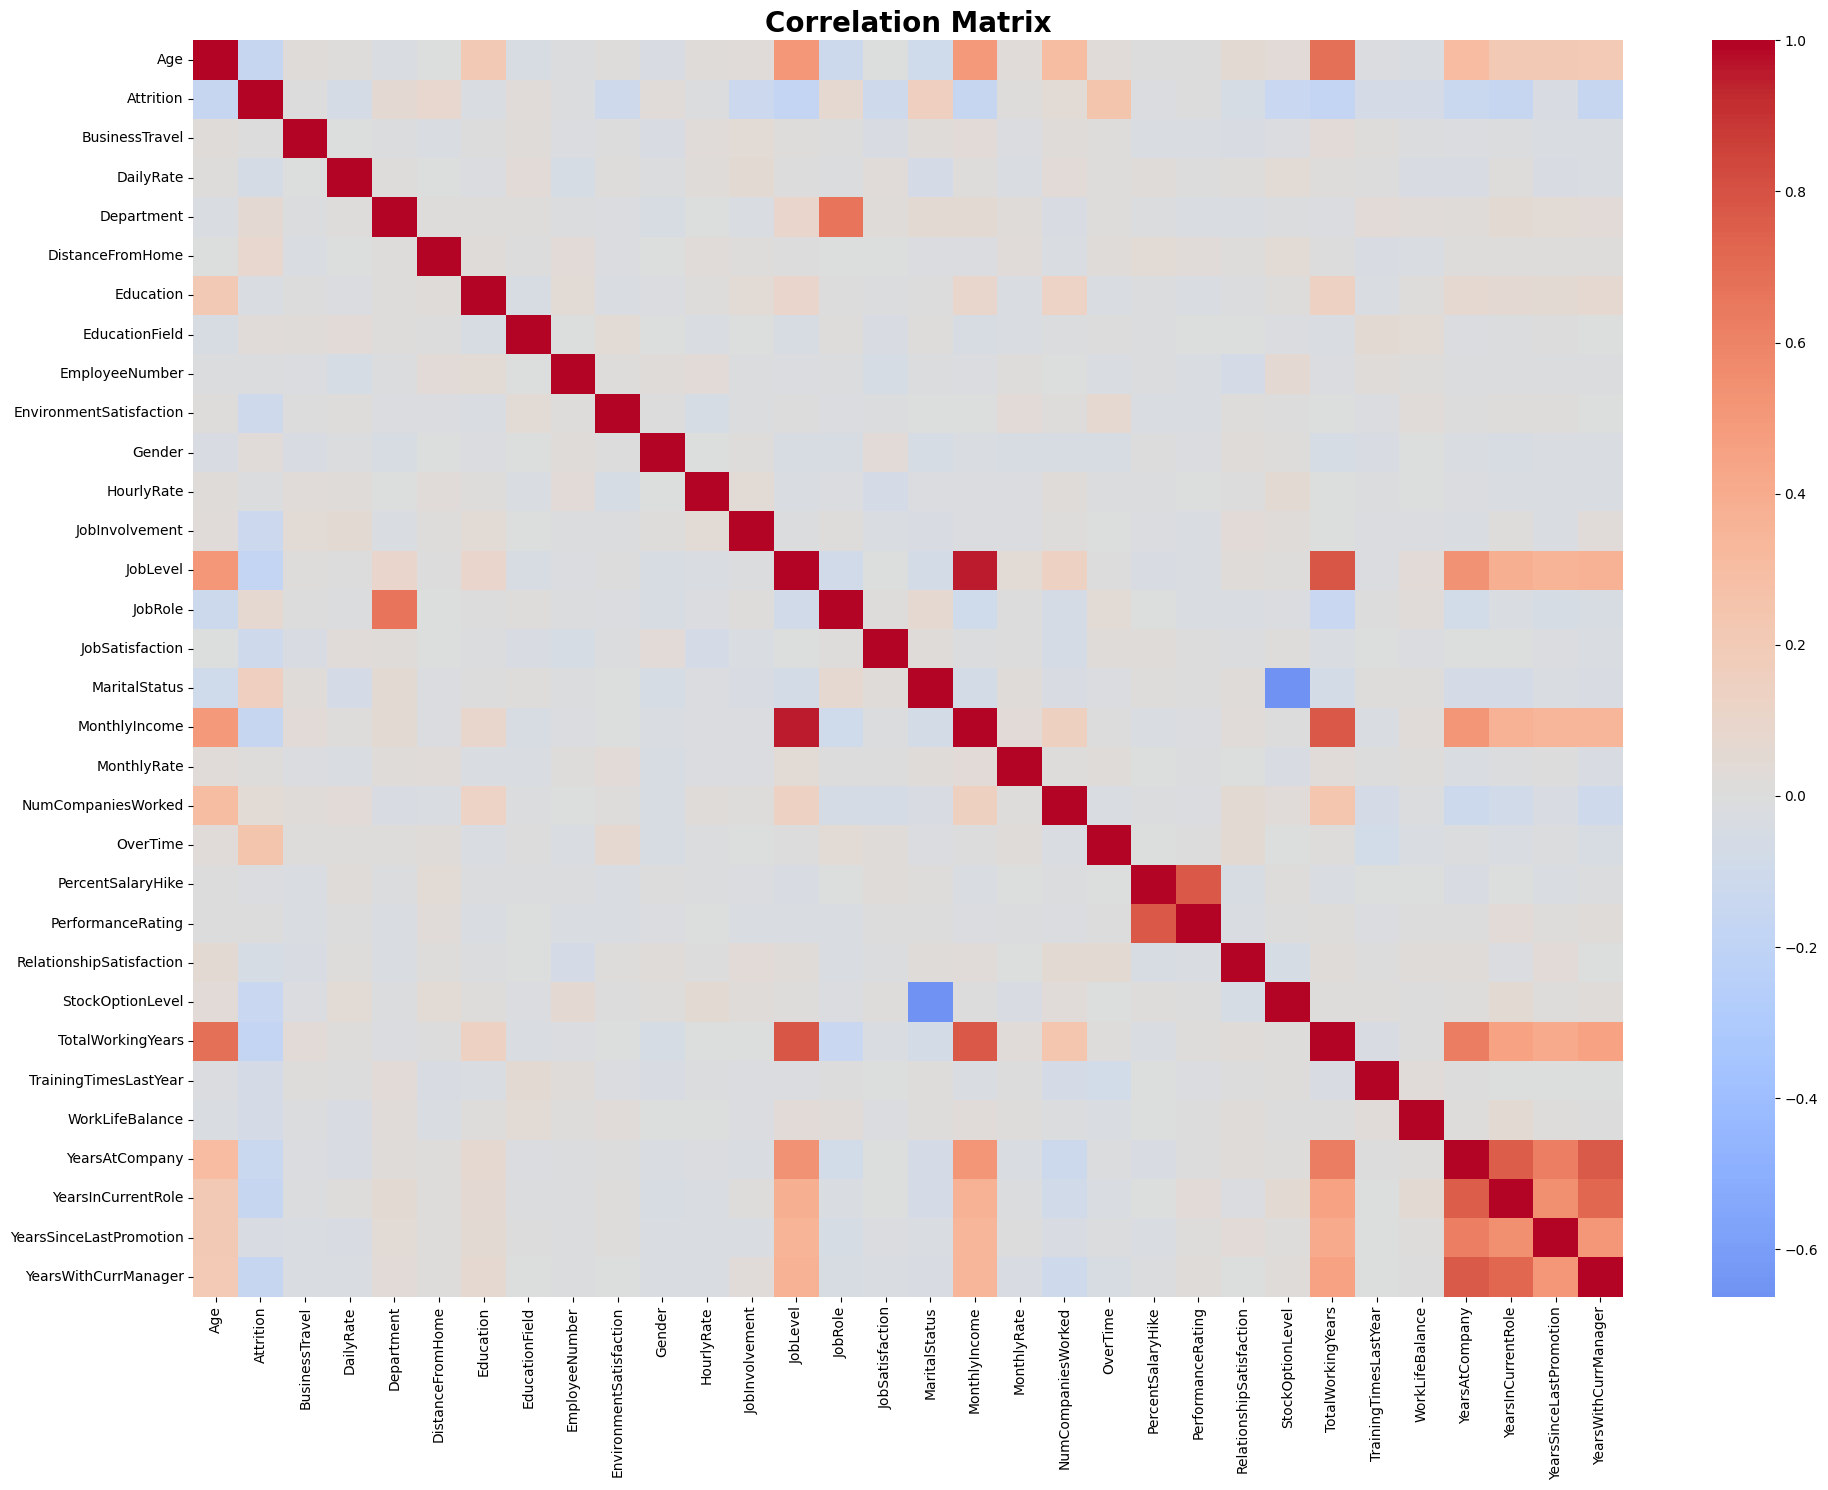

In [12]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm',fmt=".2f", center=0)
plt.title('Correlation Matrix', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig('heatmap_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

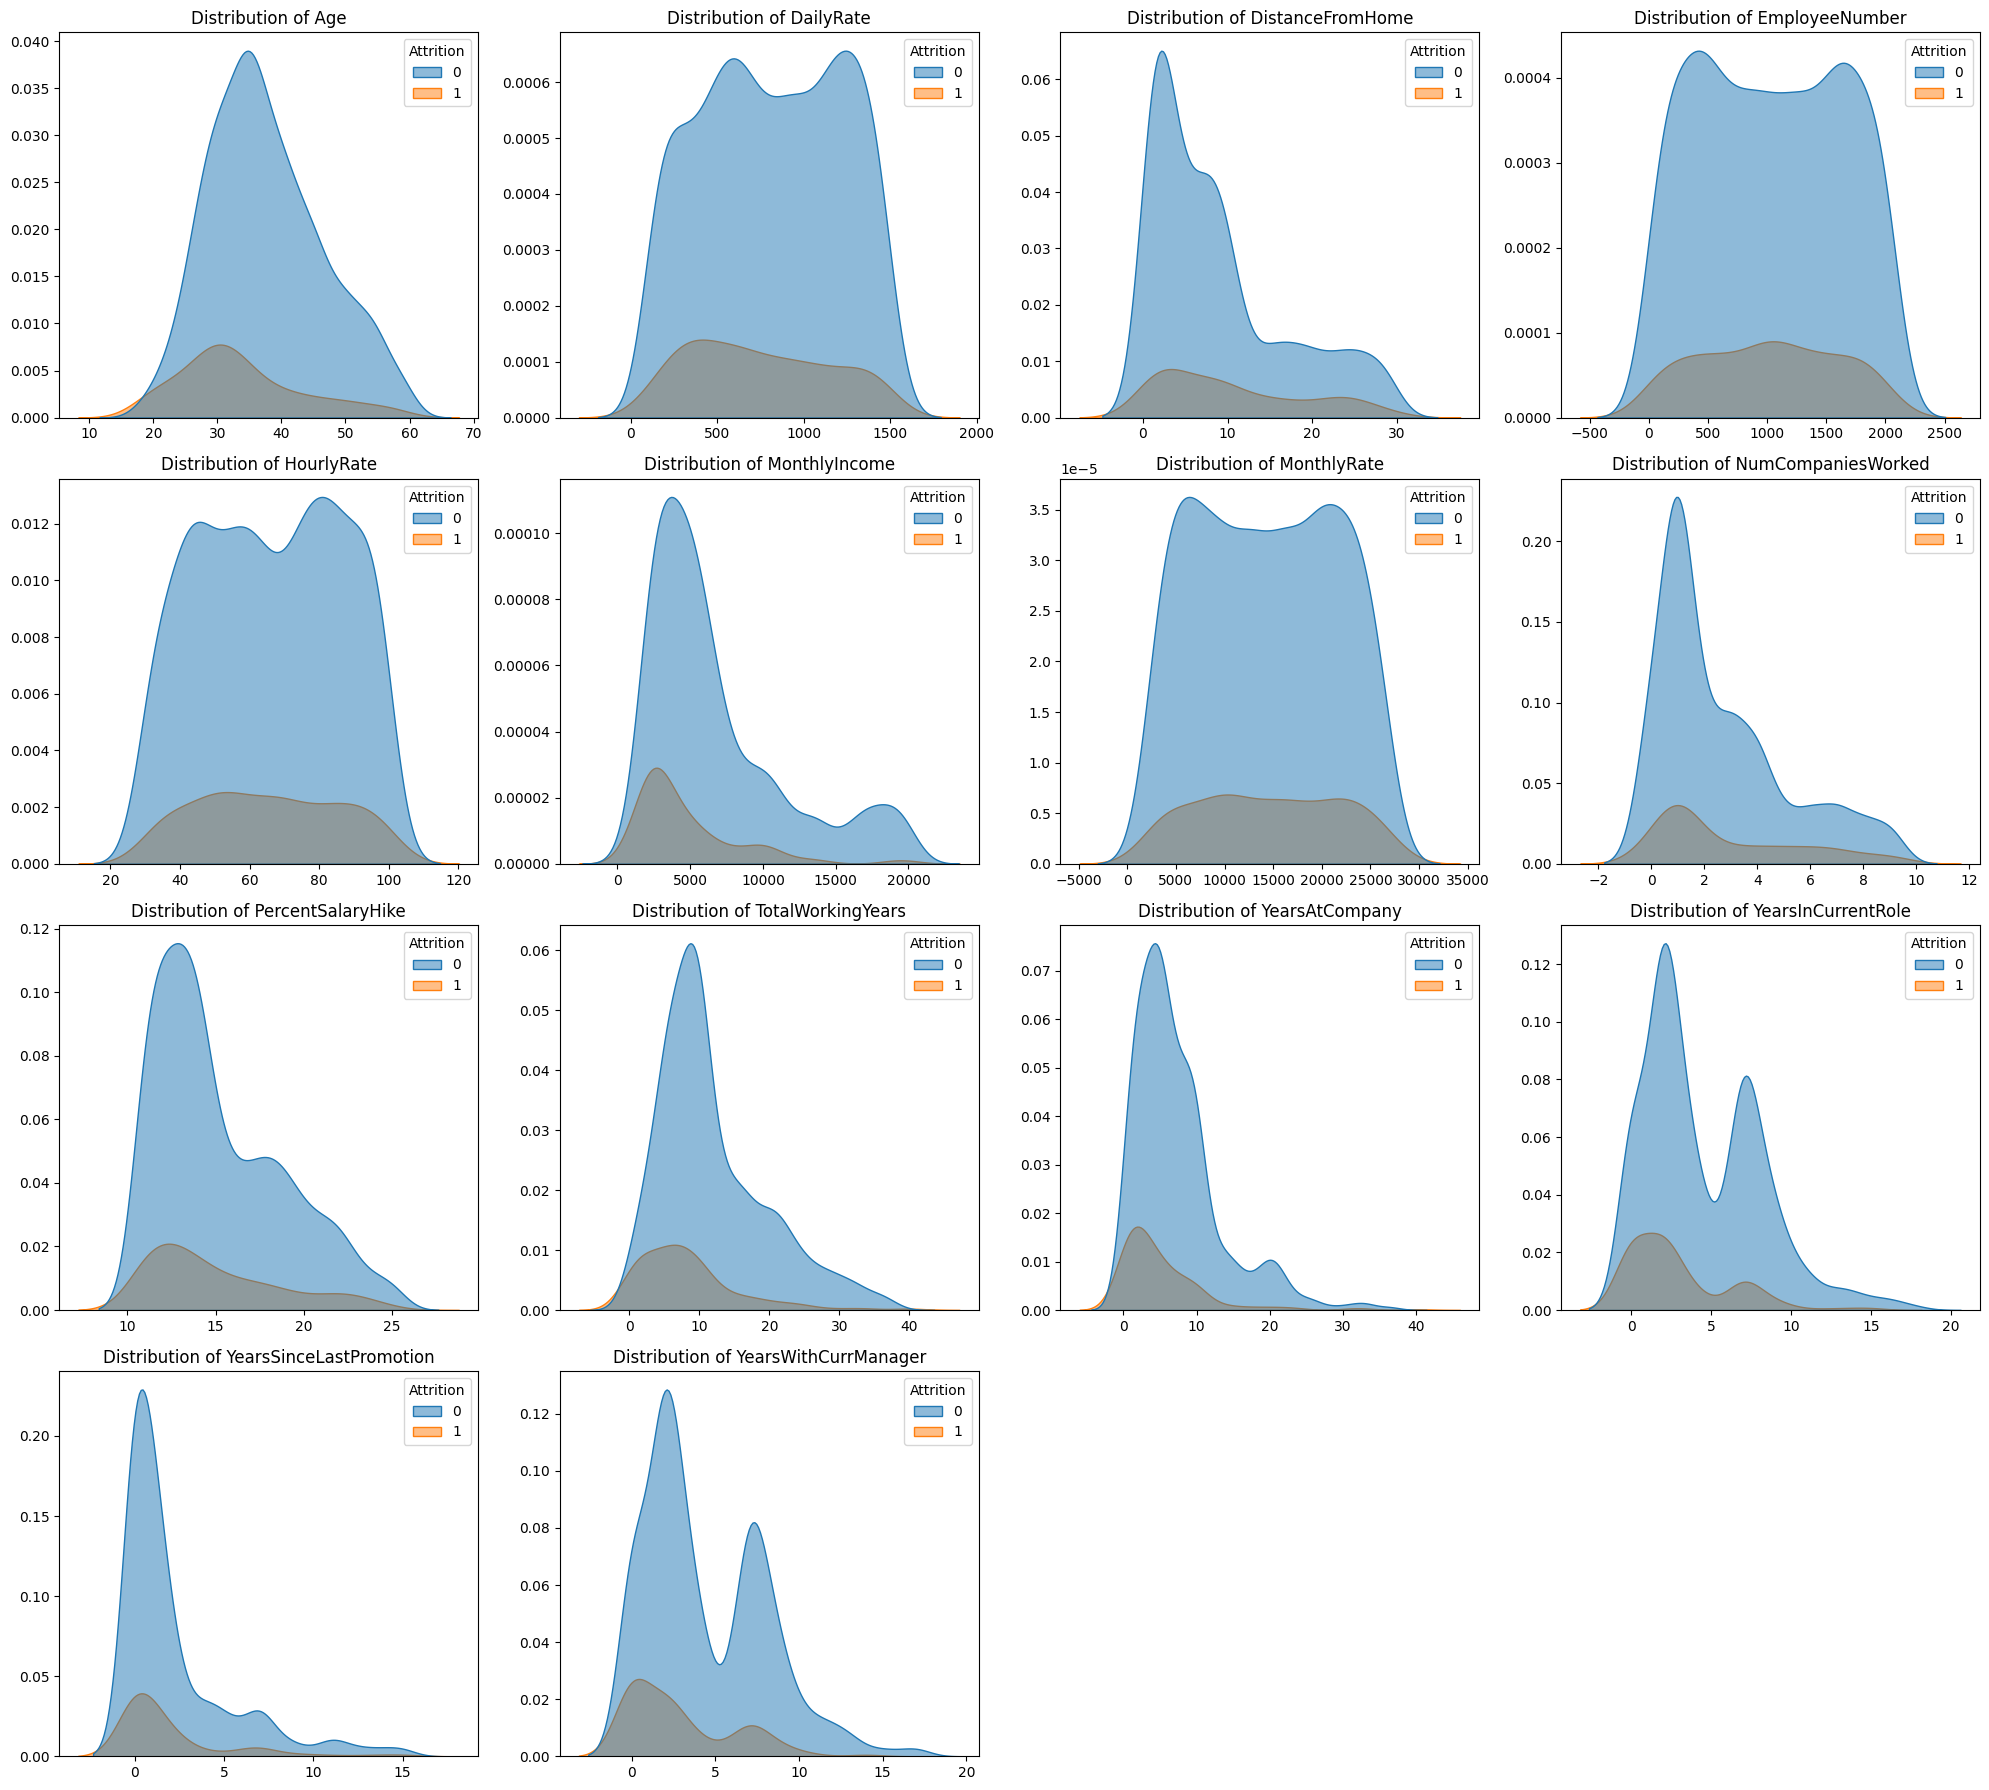

In [13]:
num_cols=['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

plt.figure(figsize=(20,18))

for i,col in enumerate(num_cols):

    plt.subplot(4,4,i+1)
    sns.kdeplot(data=df, x=col, hue='Attrition', fill=True, alpha=0.5)
    plt.title(f"Distribution of {col}")
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()


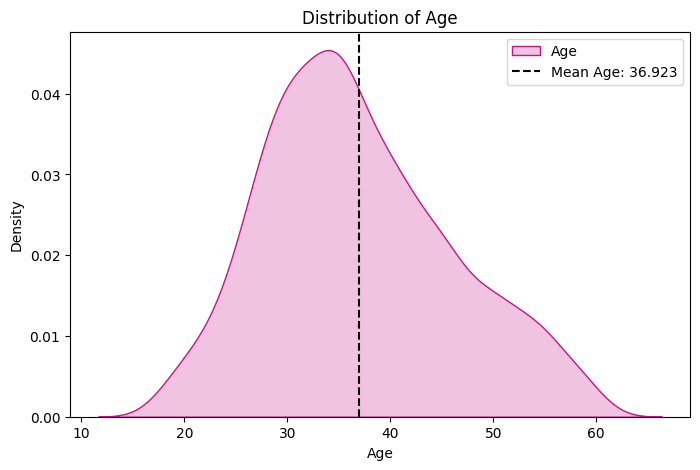

In [14]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=df['Age'],color='MediumVioletRed',shade=True,label='Age')
plt.axvline(x=df['Age'].mean(),color='k',linestyle ="--",label='Mean Age: 36.923')
plt.legend()
plt.title('Distribution of Age')
plt.show()

<Axes: xlabel='Gender', ylabel='Yearly_Salary'>

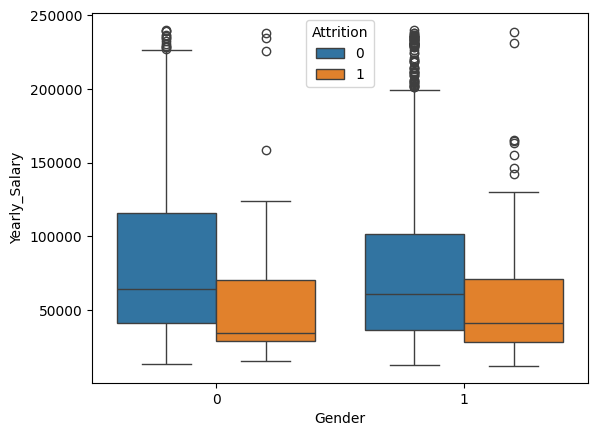

In [15]:
df['Yearly_Salary'] = df['MonthlyIncome'] * 12
sns.boxplot(data=df,x = 'Gender',y = 'Yearly_Salary',hue='Attrition')

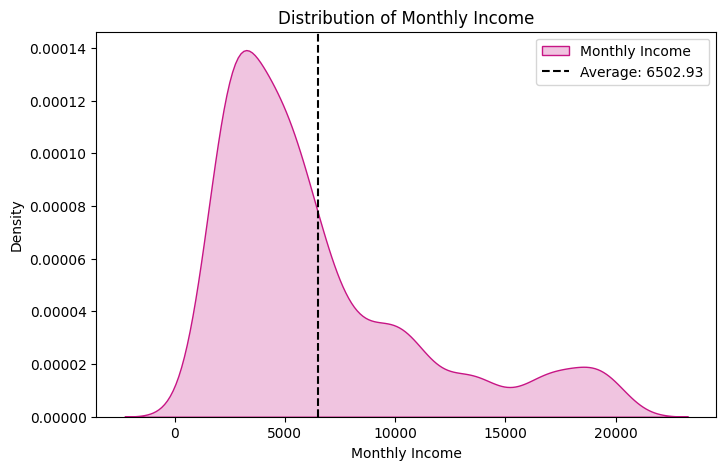

In [16]:

plt.figure(figsize=(8,5))
sns.kdeplot(x=df['MonthlyIncome'],color='MediumVioletRed',shade=True,label='Monthly Income')
plt.axvline(x=df['MonthlyIncome'].mean(),color='k',linestyle ="--",label='Average: 6502.93')
plt.xlabel('Monthly Income')
plt.legend()
plt.title('Distribution of Monthly Income')
plt.show()

Text(0.5, 1.0, 'Work Life Balance vs Attrition')

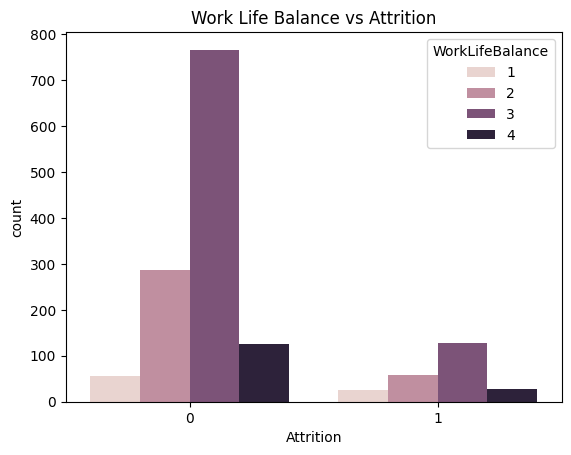

In [17]:
attrition_df = df[df['Attrition'] == 'Yes']
ax = sns.countplot(df , x = 'Attrition',hue = 'WorkLifeBalance')
plt.title('Work Life Balance vs Attrition')


#WorkLifeBalance (values 1 → Poor, 2 → Fair, 3 → Good, 4 → Excellent)

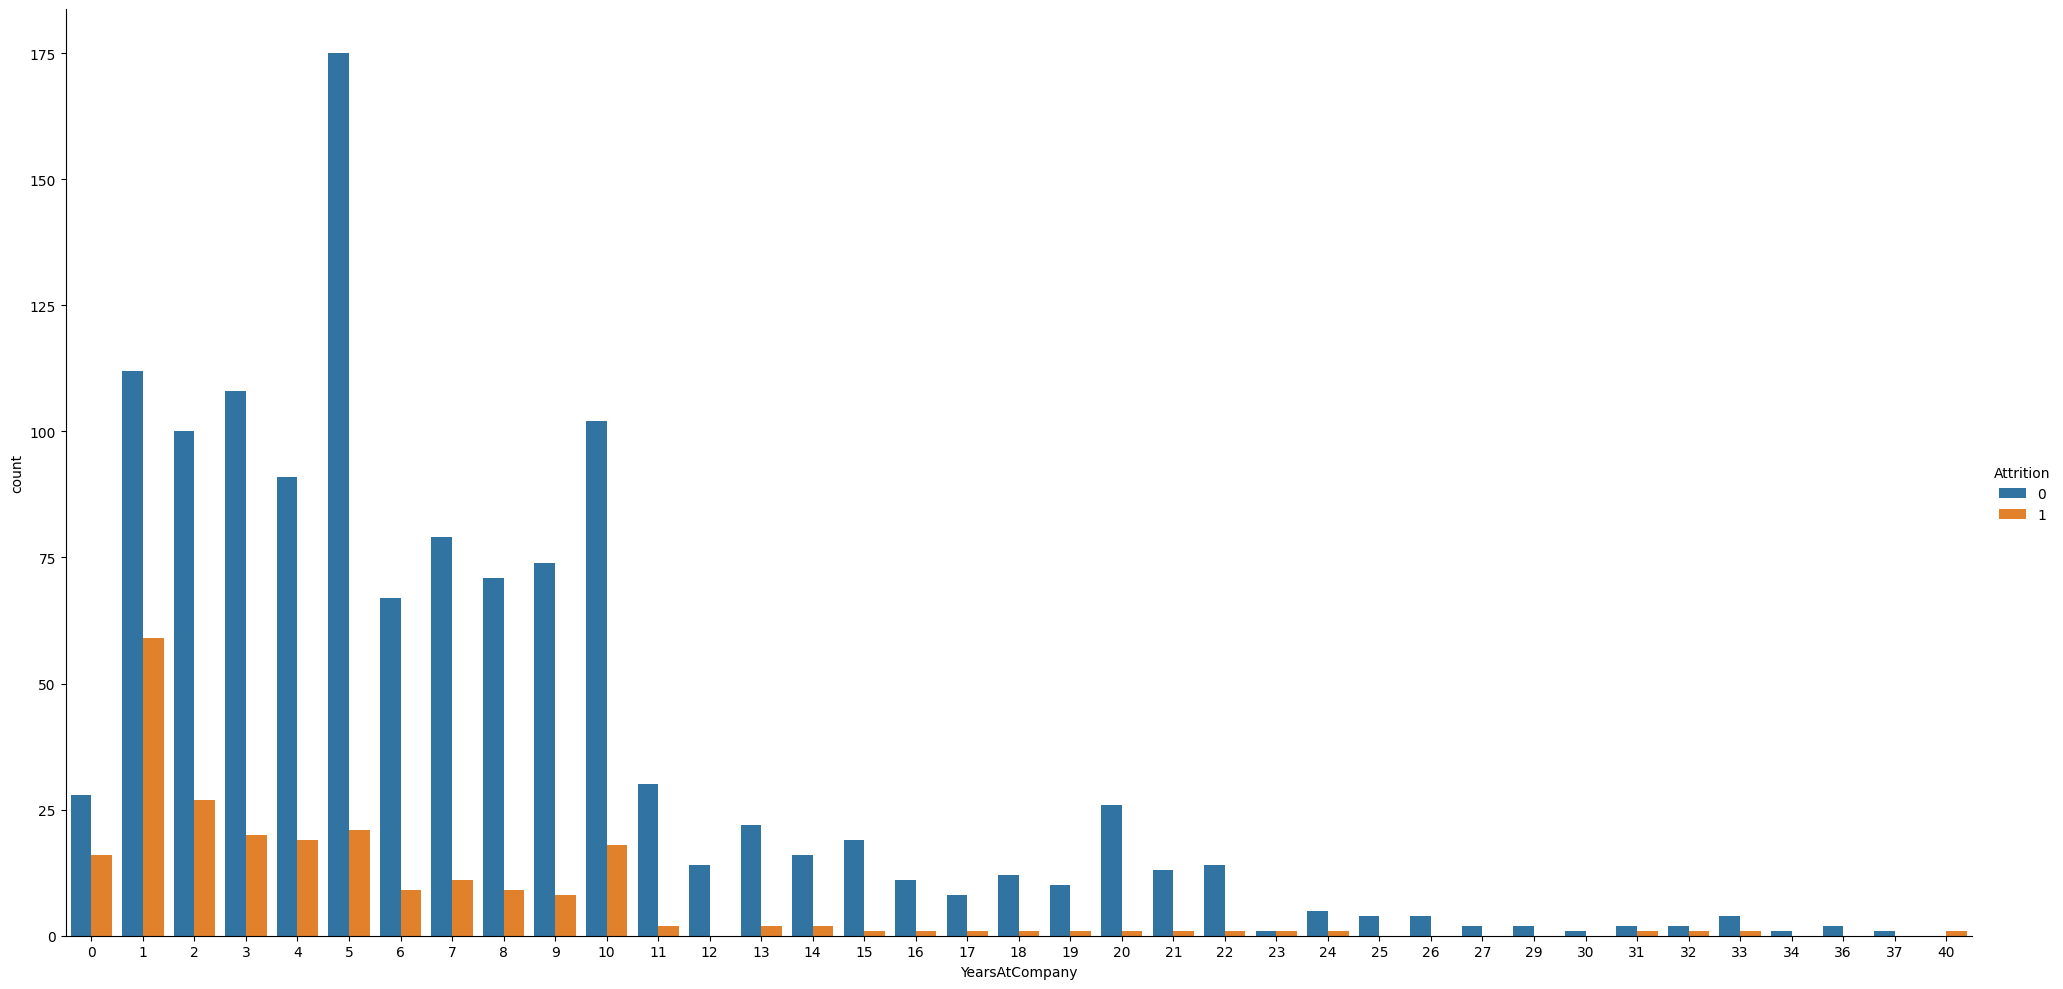

In [18]:
g = sns.catplot(
    data=df,
    x='YearsAtCompany',
    hue='Attrition',     
    kind='count',
    height=10,
    aspect=2,
    )

In [19]:
clear

## Data Preprocessing 

In [20]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yearly_Salary
0,41,1,2,1102,2,1,2,1,1,2,...,1,0,8,0,1,6,4,0,5,71916
1,49,0,1,279,1,8,1,1,2,3,...,4,1,10,3,3,10,7,1,7,61560
2,37,1,2,1373,1,2,2,4,4,4,...,2,0,7,3,3,0,0,0,0,25080
3,33,0,1,1392,1,3,4,1,5,4,...,3,0,8,3,3,8,7,3,0,34908
4,27,0,2,591,1,2,1,3,7,1,...,4,1,6,3,3,2,2,2,2,41616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,3,1,17,3,3,5,2,0,3,30852
1466,39,0,2,613,1,6,1,3,2062,4,...,1,1,9,5,3,7,7,1,7,119892
1467,27,0,2,155,1,4,3,1,2064,2,...,2,1,6,0,3,6,2,0,3,73704
1468,49,0,1,1023,2,2,3,3,2065,4,...,4,0,17,3,2,9,6,0,8,64680


In [21]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Yearly_Salary               0
dtype: int

In [22]:
df['BusinessTravel'].unique()

array([2, 1, 0])

In [23]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yearly_Salary
0,41,1,2,1102,2,1,2,1,1,2,...,1,0,8,0,1,6,4,0,5,71916
1,49,0,1,279,1,8,1,1,2,3,...,4,1,10,3,3,10,7,1,7,61560
2,37,1,2,1373,1,2,2,4,4,4,...,2,0,7,3,3,0,0,0,0,25080
3,33,0,1,1392,1,3,4,1,5,4,...,3,0,8,3,3,8,7,3,0,34908
4,27,0,2,591,1,2,1,3,7,1,...,4,1,6,3,3,2,2,2,2,41616


In [24]:
df.apply(lambda x : len(x.unique()))

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSince

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeNumber            1470 non-null   int64
 9   EnvironmentSatisfaction   1470 non-null   int64
 10  Gender                    1470 non-null   int64
 11  HourlyRate                1470 non-null   int64
 12  JobInvolvement            1470 non-null   int64
 13  JobLevel                  1470 non-null   int64
 14  JobRole                   1470 non-null 

In [26]:
df.shape


(1470, 33)

In [27]:
df.duplicated().sum()

np.int64(0)

In [28]:
numeric_cols=df.select_dtypes(include=['int64','float64']).columns.tolist()
categoty_cols=df.select_dtypes(include=['bool','category','object']).columns.tolist()

In [29]:
numeric_cols

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Yearly_Salary']

In [30]:
categoty_cols

[]

In [31]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yearly_Salary
0,41,1,2,1102,2,1,2,1,1,2,...,1,0,8,0,1,6,4,0,5,71916
1,49,0,1,279,1,8,1,1,2,3,...,4,1,10,3,3,10,7,1,7,61560
2,37,1,2,1373,1,2,2,4,4,4,...,2,0,7,3,3,0,0,0,0,25080
3,33,0,1,1392,1,3,4,1,5,4,...,3,0,8,3,3,8,7,3,0,34908
4,27,0,2,591,1,2,1,3,7,1,...,4,1,6,3,3,2,2,2,2,41616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,3,1,17,3,3,5,2,0,3,30852
1466,39,0,2,613,1,6,1,3,2062,4,...,1,1,9,5,3,7,7,1,7,119892
1467,27,0,2,155,1,4,3,1,2064,2,...,2,1,6,0,3,6,2,0,3,73704
1468,49,0,1,1023,2,2,3,3,2065,4,...,4,0,17,3,2,9,6,0,8,64680


In [32]:
df = df.drop(['BusinessTravel', 'Department', 'EducationField',
              'JobRole', 'MaritalStatus'], axis=1).join(
    pd.get_dummies(df[['BusinessTravel', 'Department', 'EducationField', 
                       'JobRole', 'MaritalStatus']].astype(str), dtype=int))

In [33]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Yearly_Salary', 'BusinessTravel_0',
       'BusinessTravel_1', 'BusinessTravel_2', 'Department_0', 'Department_1',
       'Department_2', 'EducationField_0', 'EducationField_1',
       'EducationField_2', 'EducationField_3', 'EducationField_4',
       'EducationField_5', 'JobRole_0', 'JobRole_1', 'JobRole_2', 'JobRole_3',
       'JobRole_4', 'JobRole_5', 'JobRole_6', 'JobRole_7', 'JobRole_8',
       'MaritalStatus_0', 'MaritalStatus_1', 'Marit

## Model Training

Precision: 41.72%
Accuracy: 79.25%
Recall: 71.58%

f1_score: 52.71%

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87       493
           1       0.42      0.72      0.53        95

    accuracy                           0.79       588
   macro avg       0.68      0.76      0.70       588
weighted avg       0.85      0.79      0.81       588



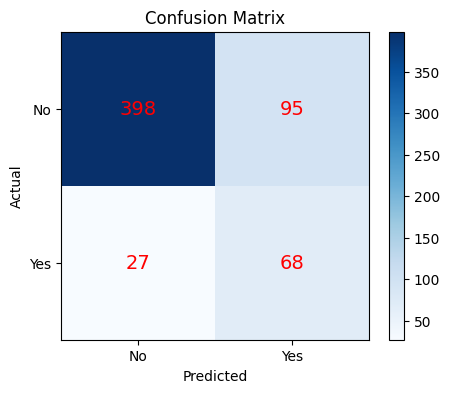

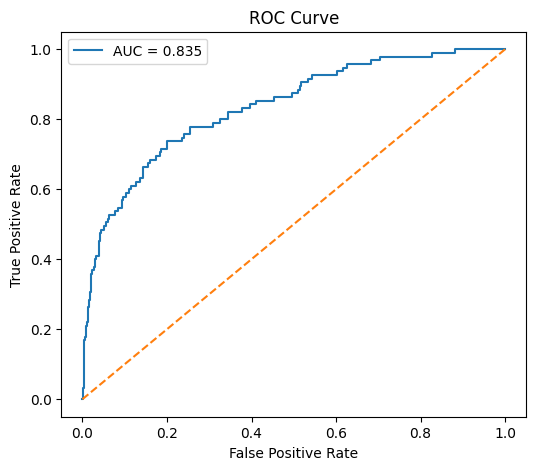

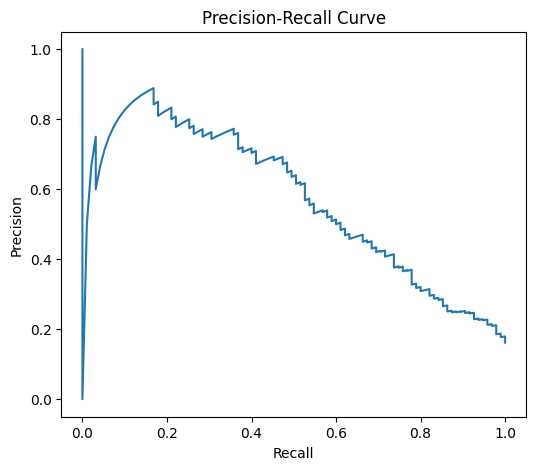

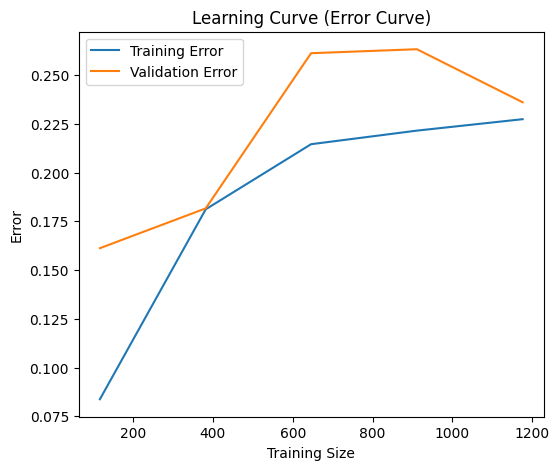

In [48]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, accuracy_score, recall_score,f1_score,
                             precision_score, confusion_matrix, roc_curve,
                             auc, precision_recall_curve)
import matplotlib.pyplot as plt




X = df.drop(columns=['Attrition'])
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1001, stratify=y
)


log_reg = LogisticRegression(max_iter=500000, class_weight='balanced', random_state=1001)
log_reg.fit(X_train, y_train)



y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1_score=f1_score(y_test, y_pred)

print(f"Precision: {precision*100:.2f}%")
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Recall: {recall*100:.2f}%\n")
print(f"f1_score: {f1_score*100:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred))




cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red', fontsize=14)

plt.show()




fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()




precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(recall_vals, precision_vals)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()




train_sizes, train_scores, test_scores = learning_curve(
    log_reg, X, y, cv=5, scoring='accuracy', n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(6, 5))
plt.plot(train_sizes, 1 - train_mean, label="Training Error")
plt.plot(train_sizes, 1 - test_mean, label="Validation Error")
plt.xlabel("Training Size")
plt.ylabel("Error")
plt.title("Learning Curve (Error Curve)")
plt.legend()
plt.show()


              Feature  Importance
14           OverTime    1.707797
50    MaritalStatus_2    0.822017
28   BusinessTravel_1    0.819359
16  PerformanceRating    0.698995
41          JobRole_2    0.671737
38   EducationField_5    0.456784
32       Department_2    0.433148
47          JobRole_8    0.360080
6              Gender    0.328606
35   EducationField_2    0.222516


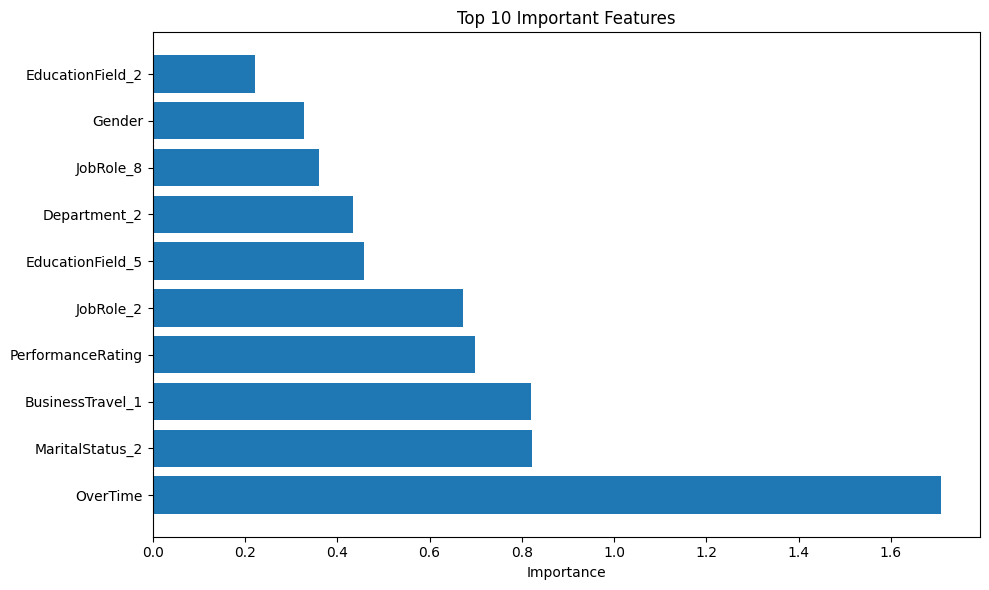

In [37]:
importance = log_reg.coef_[0]

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'].head(10), feature_importance['Importance'].head(10))
plt.xlabel('Importance')
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.show()

## XG Boost + Random Forest


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, f1_score


for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop('Attrition', axis=1)
y = LabelEncoder().fit_transform(df['Attrition'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train XGBoost
model = xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

Accuracy: 0.8639
Recall: 0.2340
F1-Score: 0.3548


In [ ]:
# Handle class imbalance
class_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])

model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=7,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=class_weight,  # For imbalanced data
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=10,
    learning_rate=0.01,
    subsample=0.7,
    colsample_bytree=0.7,
    min_child_weight=2,
    gamma=0.1,
    scale_pos_weight=class_weight,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


                 Feature  Importance
14              OverTime    0.063955
9               JobLevel    0.037944
18      StockOptionLevel    0.035509
46             JobRole_7    0.033404
25  YearsWithCurrManager    0.029987
32          Department_2    0.028657
22        YearsAtCompany    0.026088
0                    Age    0.023780
19     TotalWorkingYears    0.023465
28      BusinessTravel_1    0.023227


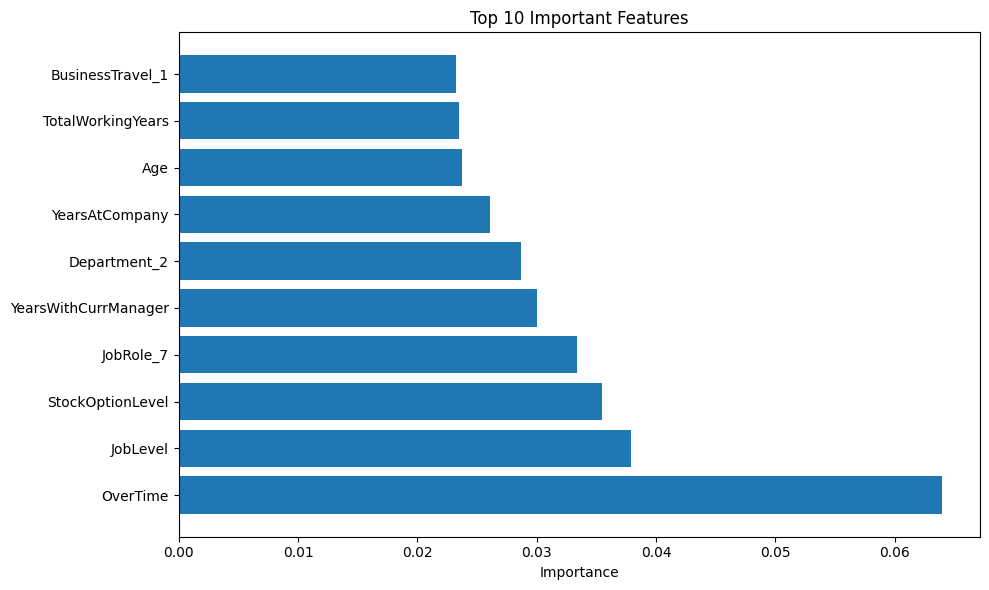

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.head(10))

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'].head(10), feature_importance['Importance'].head(10))
plt.xlabel('Importance')
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score

# XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=200, max_depth=7, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Compare
comparison = pd.DataFrame({
    'Model': ['XGBoost', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, xgb_pred), accuracy_score(y_test, rf_pred)],
    'Recall': [recall_score(y_test, xgb_pred), recall_score(y_test, rf_pred)],
    'F1-Score': [f1_score(y_test, xgb_pred), f1_score(y_test, rf_pred)]
})

print(comparison)


           Model  Accuracy    Recall  F1-Score
0        XGBoost  0.863946  0.255319  0.375000
1  Random Forest  0.836735  0.106383  0.172414


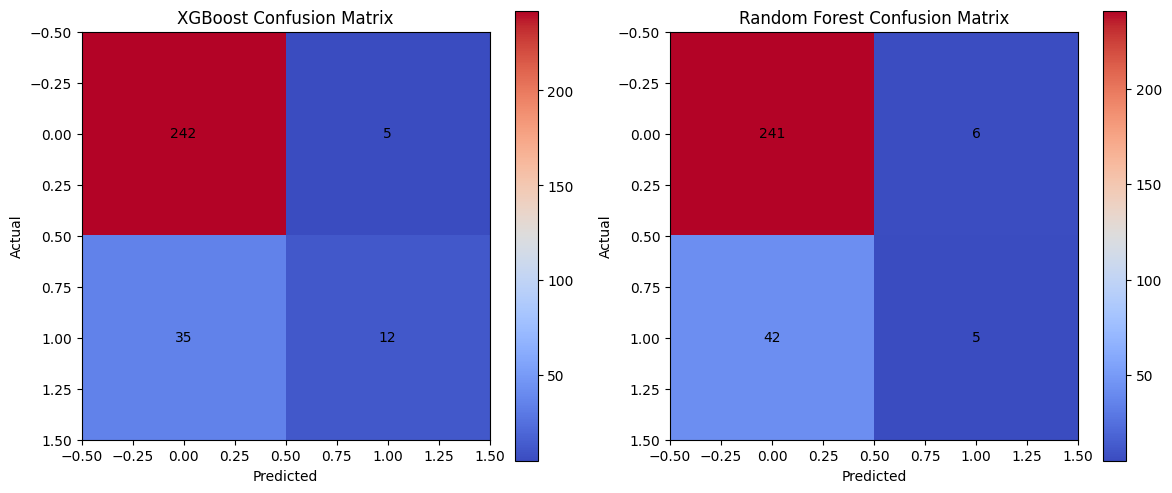

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm_xgb = confusion_matrix(y_test, xgb_pred)
cm_rf  = confusion_matrix(y_test, rf_pred)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# XGBoost
im1 = axes[0].imshow(cm_xgb, cmap="coolwarm")
axes[0].set_title('XGBoost Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

for i in range(cm_xgb.shape[0]):
    for j in range(cm_xgb.shape[1]):
        axes[0].text(j, i, cm_xgb[i, j], ha='center', va='center', color="black", fontsize=10)

plt.colorbar(im1, ax=axes[0])

# Random Forest
im2 = axes[1].imshow(cm_rf, cmap="coolwarm")
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        axes[1].text(j, i, cm_rf[i, j], ha='center', va='center', color="black", fontsize=10)

plt.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.show()


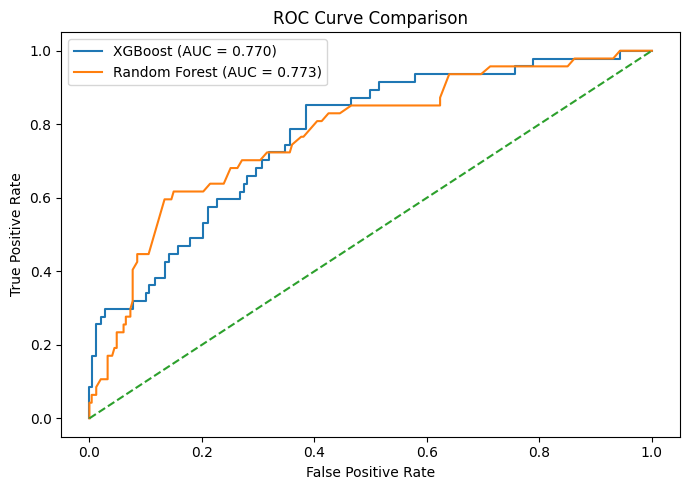

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilities for positive class
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]
rf_proba  = rf_model.predict_proba(X_test)[:, 1]

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
fpr_rf,  tpr_rf,  _ = roc_curve(y_test, rf_proba)

auc_xgb = roc_auc_score(y_test, xgb_proba)
auc_rf  = roc_auc_score(y_test, rf_proba)

plt.figure(figsize=(7, 5))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.3f})')
plt.plot(fpr_rf,  tpr_rf,  label=f'Random Forest (AUC = {auc_rf:.3f})')

plt.plot([0, 1], [0, 1], linestyle='--')  # random line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.tight_layout()
plt.show()
